# INTRODUCTION AND TITLE
Give some small info about the project and class, etc.

In [19]:
#import libraries
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

## Read and Preprocces Data

In [4]:
#read in lake data (except for seismic)
file_path = 'Data/Lake_outlines_guide.xlsx'
data = pd.read_excel(file_path, index_col="Name")
print(data.head())
    
#remove the lakes we did not analyze
good_lakes= data[data["Area (Y/N)"]=="Y"]
print(good_lakes.head())

#remove the area and why columns as they were just used in the lake choosing stage
good_lakes= good_lakes.drop(columns=["Area (Y/N)", "Why"])
print(good_lakes.head())




     Area (Y/N)                           Why  Area (m^2)  V (m^3) Dam Type  \
Name                                                                          
L02           N            Smallest lake ever           0      0.0      NaN   
L03           N            Smallest lake ever           0      0.0      NaN   
L04           N  small and no driving factors           0      0.0      NaN   
L05           N                         Small           0      0.0      NaN   
L06           N  Small and no glacier near it           0      0.0      NaN   

     Connection  Distance From Glacier  Up Slope (MAXpct)  \
Name                                                        
L02         NaN                    NaN                NaN   
L03         NaN                    NaN                NaN   
L04         NaN                    NaN                NaN   
L05         NaN                    NaN                NaN   
L06         NaN                    NaN                NaN   

      Upstream Slo

In [5]:
#seismic data

In [6]:
print(good_lakes["V (m^3)"].describe())
print(good_lakes[good_lakes["V (m^3)"]>10**7])

count    3.300000e+01
mean     6.935359e+06
std      1.327462e+07
min      2.925618e+05
25%      1.333873e+06
50%      3.693438e+06
75%      7.589301e+06
max      7.707703e+07
Name: V (m^3), dtype: float64
      Area (m^2)       V (m^3) Dam Type Connection  Distance From Glacier  \
Name                                                                        
L39       468564  1.173614e+07        m          N                 286.41   
L45       453818  1.121516e+07        b          N                 421.92   
L50       599632  1.665826e+07        b          N                 385.29   
L61      1763610  7.707703e+07        m          N                  -1.00   
L64       540880  1.438920e+07        m         Y2                   0.00   

      Up Slope (MAXpct)  Upstream Slope (MAXdeg)  Down Slope (MAXpct)  \
Name                                                                    
L39                71.0                35.374752                 36.3   
L45                78.1            

In [7]:
print(good_lakes["Area (m^2)"].describe())
print(good_lakes[good_lakes["Area (m^2)"]<10**5])

count    3.300000e+01
mean     2.745693e+05
std      3.059625e+05
min      3.480800e+04
25%      1.013190e+05
50%      2.075780e+05
75%      3.447010e+05
max      1.763610e+06
Name: Area (m^2), dtype: float64
      Area (m^2)       V (m^3) Dam Type Connection  Distance From Glacier  \
Name                                                                        
L07        54205  5.487433e+05        b         Y2                 576.00   
L24        88610  1.102704e+06        b          N                 313.08   
L25        75402  8.768332e+05        b          N                 426.62   
L51        97928  1.270928e+06        m         Y2                   0.00   
L52        74843  8.676169e+05        b         Y2                 726.99   
L53        66162  7.282787e+05        m          N                  94.76   
L54        34808  2.925618e+05        m         Y1                 289.79   
L59        38292  3.350015e+05        m          N                  -1.00   

      Up Slope (MAXp

## GLOF RISK AND HAZARD

In [9]:
def dam_type(type):
    if type=='b':
        return 1
    if type=='m':
        return 2
    if type=='i':
        return 3

def connections(type):
    if type=='N':
        return 1
    if type=='Y1':
        return 2
    if type=='Y2':
        return 3

def volume(vol):
    if vol<10**6:
        return 1
    elif vol<10**7:
        return 2
    else:
        return 3

def area(A):
    if A<10**5:
        return 1
    elif A<5*10**5:
        return 2
    else:
        return 3

def distance(dist):
    if dist==-1:
        return 0
    if dist>800:
        return 1
    elif dist>400:
        return 2
    else:
        return 3
        
def upstream_slope(deg):
    if deg==0:
        return 0
    if deg<30:
        return 1
    elif deg<38:
        return 2
    else:
        return 3

def downstream_slope(deg):
    if deg<13:
        return 1
    elif deg<18:
        return 2
    else:
        return 3

In [10]:
names = []
volumes = []
areas = []
dam_types = []
distances = []
upstream_slopes = []
downstream_slopes = []
connections_list = []
total_scores = []
avg_scores= []

#for loop to look at each lake individually
for index, row in tqdm(good_lakes.iterrows(), total=len(good_lakes), desc="Processing rows"):
    sum=0 #tracking the hazard/risk score
    
    #check volume
    vol_score= volume(row["V (m^3)"])
    
    #check area
    area_score= area(row["Area (m^2)"])

    #check dam type
    dam_score= dam_type(row["Dam Type"])

    #check distance from glacier
    dist_score= distance(row["Distance From Glacier"])
    
    #check slope between glacier and lake
    up_score= upstream_slope(row["Upstream Slope (MAXdeg)"])

    #check downstream slope of lake
    down_score= downstream_slope(row["Downstream Slope (AVGdeg)"])

    #check river and lake connections
    conn_score= connections(row["Connection"])

    #check seismic (wait)

    #combine the results
    sum = vol_score + area_score + dam_score + dist_score + up_score + down_score + conn_score
        
    # Append all results to lists
    names.append(index)  # The lake name is the index
    volumes.append(vol_score)
    areas.append(area_score)
    dam_types.append(dam_score)
    distances.append(dist_score)
    upstream_slopes.append(up_score)
    downstream_slopes.append(down_score)
    connections_list.append(conn_score)
    total_scores.append(sum)
    avg_scores.append(sum/7)


results = pd.DataFrame({'Lake Name': names, 'Volume Score': volumes, 'Area Score': areas, 'Dam Type Score': dam_types, 'Distance Score': distances,
                        'Upstream Slope Score': upstream_slopes, 'Downstream Slope Score': downstream_slopes, 'Connection Score': connections_list,
                        'Total Hazard Score': total_scores, 'Avg Hazard Score': avg_scores})
    
# Set Lake Name as index
results.set_index('Lake Name', inplace=True)

print(results)

Processing rows: 100%|██████████| 33/33 [00:00<00:00, 10899.44it/s]

           Volume Score  Area Score  Dam Type Score  Distance Score  \
Lake Name                                                             
L01                   2           2               1               0   
L07                   1           1               1               2   
L13                   2           2               1               0   
L16                   2           2               1               2   
L19                   2           2               2               2   
L20                   2           2               2               3   
L22                   2           2               2               2   
L24                   2           1               1               3   
L25                   1           1               1               2   
L27                   2           2               1               1   
L28                   2           2               2               1   
L29                   2           2               2               2   
L30   

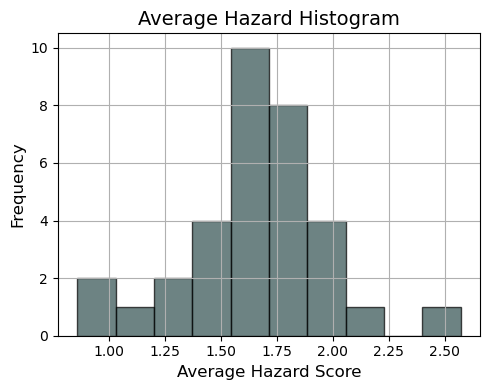

In [75]:
#make some plots
plt.figure(figsize=(5,4))
    
# Create the histogram
results["Avg Hazard Score"].hist(bins=10, alpha=0.7, color='darkslategrey', edgecolor='black')
    
# Add title and labels
plt.title("Average Hazard Histogram", fontsize=14)
plt.xlabel("Average Hazard Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
    
# Show the plot
plt.tight_layout()
# plt.savefig("Results/hist_avgHazard.png")
plt.show()

In [12]:
#create table
# results.to_csv('Results/result.csv', index=True)

## MORE ANALYSIS

In [23]:
#read in lake data (except for seismic)
file_path = 'Data/Lake_outlines_guide_subset.xlsx'
df = pd.read_excel(file_path, index_col="Name")
print(df.head())



      Area (m^2)  Volume  (m^3) Dam Type Connection  Distance From Glacier  \
Name                                                                         
L01       199166   3.482723e+06        b         Y2                  -1.00   
L07        54205   5.487433e+05        b         Y2                 576.00   
L13       211480   3.792414e+06        b         Y1                  -1.00   
L16       136590   2.038582e+06        b         Y1                 500.00   
L19       311849   6.583159e+06        m          N                 457.79   

      Up Slope (MAXpct)  Upstream Slope (MAXdeg)  Down Slope (MAXpct)  \
Name                                                                    
L01                 0.0                 0.000000                 56.5   
L07                71.5                35.564768                 55.9   
L13                 0.0                 0.000000                 87.0   
L16                59.5                30.752646                 70.4   
L19            

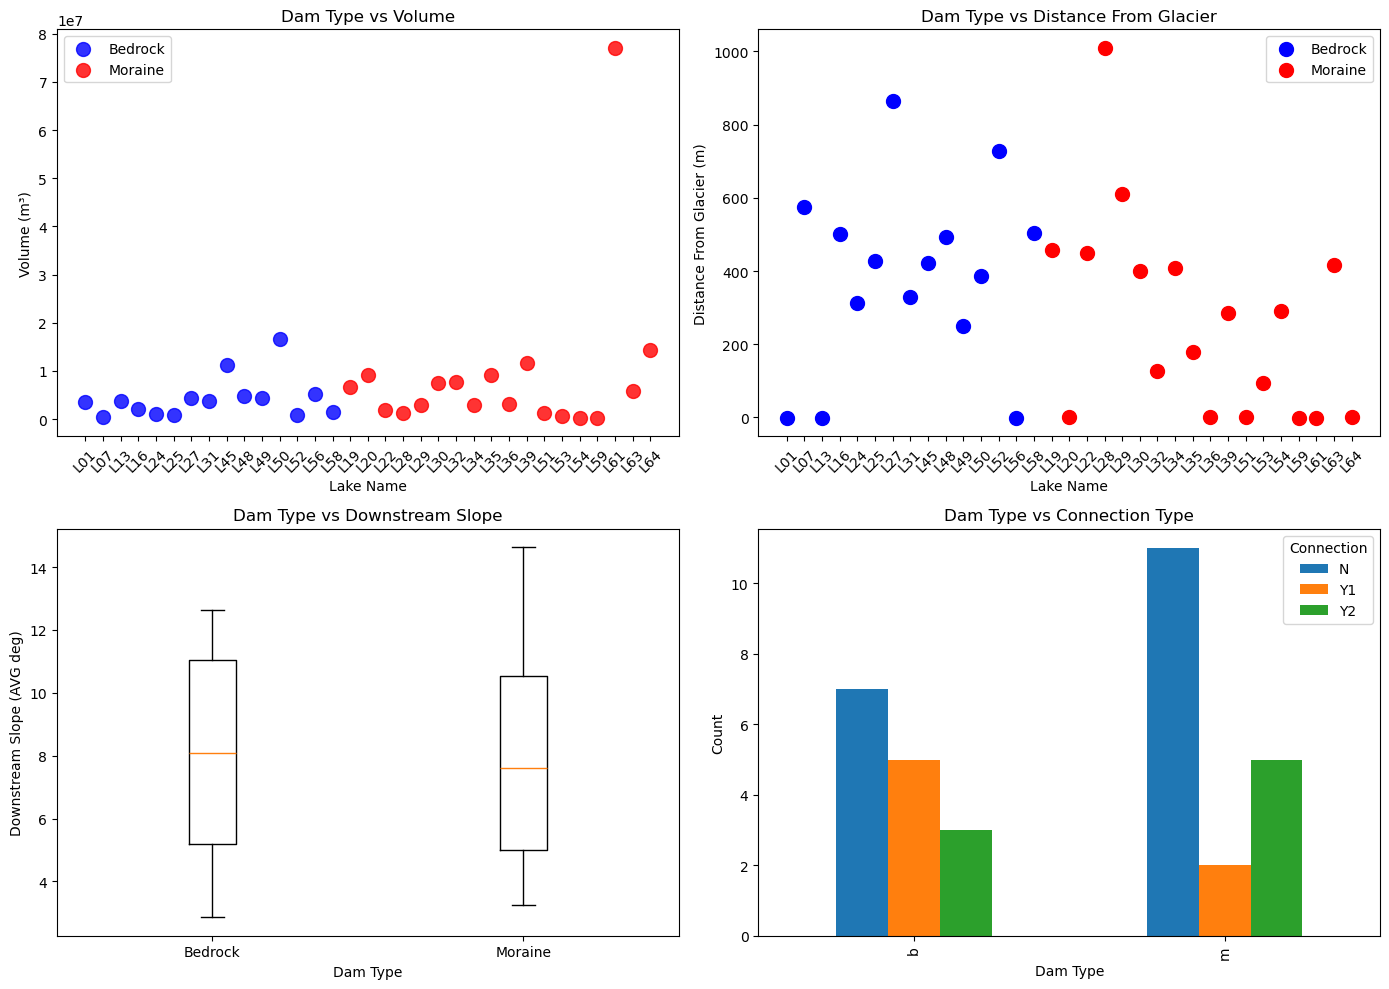

In [69]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Define color mapping and names for dam types
dam_colors = {'b': 'blue', 'm': 'red'}
dam_names = {'b': 'Bedrock', 'm': 'Moraine'}

# 1. Dam Type vs Volume - Scatter plot
for dam_type in df['Dam Type'].unique():
    subset = df[df['Dam Type'] == dam_type]
    axes[0, 0].scatter(subset.index, subset['Volume  (m^3)'], 
                     label=dam_names[dam_type],
                     color=dam_colors[dam_type], 
                     s=100, alpha=0.8)

axes[0, 0].set_title('Dam Type vs Volume')
axes[0, 0].set_ylabel('Volume (m³)')
axes[0, 0].set_xlabel('Lake Name')
axes[0, 0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Dam Type vs Distance From Glacier - Scatter plot
distance_col = 'Distance From Glacier'  # Assuming this is the exact column name
for dam_type in df['Dam Type'].unique():
    subset = df[df['Dam Type'] == dam_type]
    axes[0, 1].scatter(subset.index, subset[distance_col], 
                      label=dam_names[dam_type], 
                      color=dam_colors[dam_type], s=100)

axes[0, 1].set_title('Dam Type vs Distance From Glacier')
axes[0, 1].set_ylabel('Distance From Glacier (m)')
axes[0, 1].set_xlabel('Lake Name')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Dam Type vs Downstream Slope - Box plot
downstream_slope_col = 'Downstream Slope (AVGdeg)'  # Assuming this is the exact column name

# Group data by dam type for boxplot
box_data = [df[df['Dam Type'] == dtype][downstream_slope_col].tolist() 
            for dtype in sorted(df['Dam Type'].unique())]
            
axes[1, 0].boxplot(box_data)
axes[1, 0].set_xticklabels([dam_names[dtype] for dtype in sorted(df['Dam Type'].unique())])
axes[1, 0].set_title('Dam Type vs Downstream Slope')
axes[1, 0].set_ylabel('Downstream Slope (AVG deg)')
axes[1, 0].set_xlabel('Dam Type')

# 4. Dam Type vs Connection Type - Count plot
connection_counts = df.groupby(['Dam Type', 'Connection']).size().unstack(fill_value=0)
connection_counts.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Dam Type vs Connection Type')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xlabel('Dam Type')
axes[1, 1].legend(title='Connection')

plt.tight_layout()
# plt.savefig("dam_type_analysis.png")
plt.show()